## Bloch Theorem

In [48]:
import numpy as np
import pandas as pd
import ipywidgets as ipw
import matplotlib.pyplot as plt

from scipy.integrate import solve_bvp
from bokeh.io import push_notebook, output_notebook, show
from bokeh.layouts import row, column
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource
output_notebook()

from ipywidgets import interact

Loading BokehJS ...

In [49]:
def delta(x,w,A):
     return A/(w*np.sqrt(np.pi))*np.exp(-x**2/w**2)

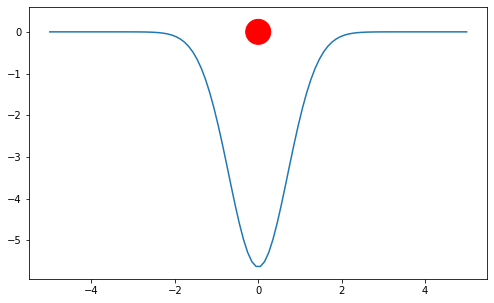

In [101]:
x = np.linspace(-5,5,100);
w = 1;
A = -10
potential = delta(x,1,-10)
fig0,ax0 = plt.figure(figsize = (10,5)),plt.gca()
pot = plt.plot(x,potential)
atom = plt.Circle((0,0),0.3,color = 'red')
ax0.add_patch(atom);
plt.axis('scaled');
#plt.tight_layout()

In [102]:
def bloch(x,u):
    k = 1/(2*w);
    return np.vstack((u[1],(k**2 + delta(x,1,-10))*u[0]+2*1j*k*u[1]))

def bc(x,u):
    return np.array([x[0],u[0]]);

/Users/yikaiyang/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


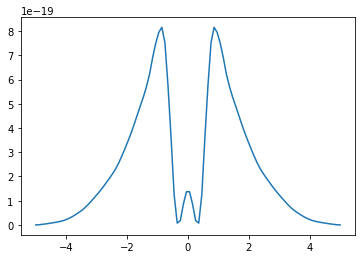

In [106]:
u0 = np.zeros((2,x.size));
u0[0] = 1;
ws = solve_bvp(bloch,bc,x,u0);
plt.plot(x,np.abs(ws.sol(x)[0])**2);